# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'lab 2 data/train.p'
testing_file = 'lab 2 data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?

# image size 32x32 with 3 color channels(this is in the pickle file and the original sizes varies)
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
all_labels = np.append(y_train, y_test)
n_classes = len(np.unique(all_labels))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)   # 32x32 RGB 3 color channel
print("Number of classes =", n_classes)    # Label 0-42

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


/home/alexxucui/anaconda3/envs/tf-gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Number of training examples for label 0 = 210
Number of testing examples for label 1 = 2220
Number of testing examples for label 2 = 2250


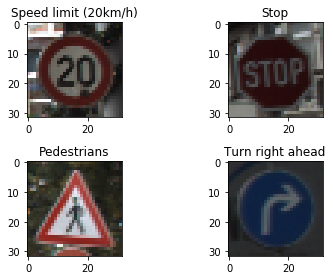

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Plot some traffic signs with true labels (classes)
#Some images are really pood quality

plt.subplot(221)
index = np.argwhere(y_train==0).item(-1)
plt.imshow(X_train[index])
plt.title('Speed limit (20km/h)')

plt.subplot(222)
index = np.argwhere(y_train==14).item(-1)
plt.imshow(X_train[index])
plt.title('Stop')

plt.subplot(223)
index = np.argwhere(y_train==27).item(-1)
plt.imshow(X_train[index])
plt.title('Pedestrians')

plt.subplot(224)
index = np.argwhere(y_train==33).item(-1)
plt.imshow(X_train[index])
plt.title('Turn right ahead')

plt.tight_layout()

#Calculate the count for each sign in the training set
number_by_class = []

for i in range(n_classes):
    count = len(np.argwhere(y_train == i))
    number_by_class.append(count)

print("Number of training examples for label 0 =", number_by_class[0])
print("Number of testing examples for label 1 =", number_by_class[1])
print("Number of testing examples for label 2 =", number_by_class[2])

# can access other labels count in the same way, will visulize below

In [5]:
# Max/Min number of signs
print("Max Number of training examples is label ", np.argmax(number_by_class))
print("Min Number of training examples is label ", np.argmin(number_by_class))

# Average number of signs
print("Average Number of training examples is ", round(np.mean(number_by_class)))

Max Number of training examples is label  2
Min Number of training examples is label  0
Average Number of training examples is  912.0


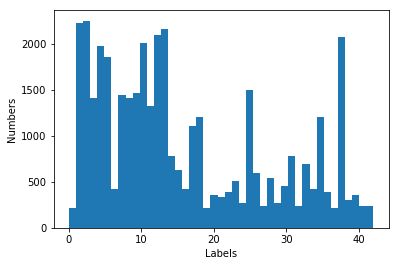

In [6]:
#Visulize the label count distribution

plt.hist(y_train, bins=43)
plt.xlabel('Labels')
plt.ylabel('Numbers')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [13]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#Import some modules
import time
import math
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import tensorflow as tf
import prettytensor as pt     #To build CNN
#from tqdm import tqdm


AssertionError: Method already defined: reshape

In [9]:
#Nomalize the coloar channels to 0 and 1
def normalize_colorscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ((image_data-greyscale_min)*(b-a)/(greyscale_max-greyscale_min))

X_train = normalize_colorscale(X_train)
X_test = normalize_colorscale(X_test)



In [8]:
#Seperate the traing-set into 90% traing-set and 10% validation-set

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [9]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Test-set:\t\t{}".format(len(X_test)))
print("- Validation-set:\t{}".format(len(X_valid)))

Size of:
- Training-set:		35288
- Test-set:		12630
- Validation-set:	3921


In [10]:
#One-hot enconded labels
y_train_labels = label_binarize(y_train, classes=range(43)).astype(float)
y_valid_labels = label_binarize(y_valid, classes=range(43)).astype(float)
y_test_labels = label_binarize(y_test, classes=range(43)).astype(float)

In [11]:
#Data Dimension

img_size = 32

img_shape = (img_size, img_size)

#Color channels
num_channels = 3

# Total 43 traffic signs
num_classes = 43 


In [12]:
#helper-function for plotting images
# Plot 3x3 traffic signs with true class labels

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

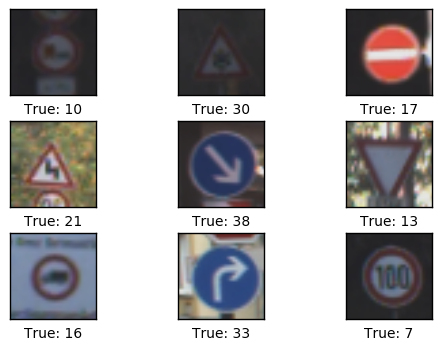

In [13]:
#Randomly plot 9 traffic signs with true labels

index = np.random.randint(43, size=9)
images  = X_test[index]
cls_true = y_test[index]
plot_images(images=images, cls_true=cls_true)

### Use TensorFlow and prettytensor to build a one/two layer CNN

In [14]:
# Placeholder variables

x_image = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, 43], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# Feed dicts for training, validation, and test session
train_feed_dict = {x_image: X_train, y_true: y_train_labels}
valid_feed_dict = {x_image: X_valid, y_true: y_valid_labels}
test_feed_dict = {x_image: X_test, y_true: y_test_labels}

In [15]:
# Use PrettyTensor to Implement the two layer CNN

x_pretty = pt.wrap(x_image)

with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=16, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=36, name='layer_conv2').\
        max_pool(kernel=2, stride=2).\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(class_count=43, labels=y_true)
        

### Run TensorFlow

In [16]:
#Define the optimizer and learning rate
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(loss)

In [17]:
#Performance measures
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [18]:
#Init
session = tf.Session()
session.run(tf.initialize_all_variables())

In [19]:
# Measurements use for graphing loss and accuracy
log_batch_step = 10
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

def optimize(epochs=2, batch_size=128):
    
    batch_count = int(math.ceil(len(X_train)/batch_size))
    
    # Start-time used for printing time-usage below.
    start_time = time.time()

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = X_train[batch_start:batch_start + batch_size]
            batch_labels = y_train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run([optimizer, loss], feed_dict={x_image: batch_features, y_true: batch_labels})
            
            if batch_i % log_batch_step ==0:
                batches.append(epoch_i*batch_count+batch_i+1)
                loss_batch.append(l)
                train_accuracy = session.run(accuracy, feed_dict={x_image: batch_features, y_true: batch_labels})       
                train_acc_batch.append(train_accuracy)
            
                # Random pick small subset of validation set to validate the performance
                valid_sub = np.random.randint(len(X_valid), size=batch_size)
                valid_accuracy = session.run(accuracy, feed_dict={x_image: X_valid[valid_sub], y_true: y_valid_labels[valid_sub]})       
                valid_acc_batch.append(valid_accuracy)         
      
    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    
    msg = "Training Accuracy: {1:>6.1%}, Validation Accuracy: {1:>6.1%},"
    print(msg.format(train_accuracy, valid_accuracy))
    
    
    plt.subplot(211)
    plt.plot(batches,loss_batch)
    plt.xlabel('Batch Number')
    plt.xlabel('Loss')
    
    plt.subplot(212)
    plt.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
    plt.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
    plt.xlabel('Batch Number')
    plt.legend(loc=4)
                
    plt.tight_layout()
   


Epoch 50/50: 100%|██████████| 552/552 [00:50<00:00, 10.84batches/s]


Time usage: 0:44:18
Training Accuracy:  98.4%, Validation Accuracy:  98.4%,


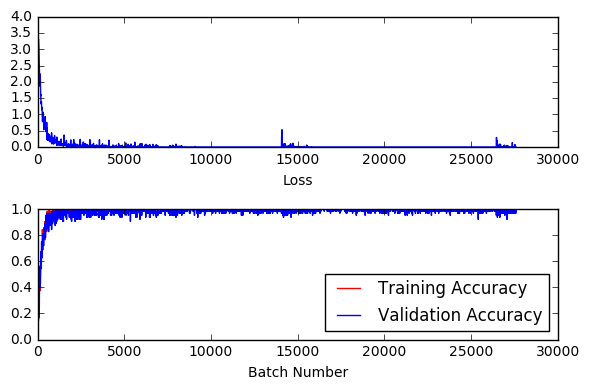

In [20]:
optimize(epochs=50, batch_size=64)

In [21]:
# run the model on test set

In [22]:
### Helper function to print the error image

def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_test[incorrect]
    
    # Plot the first 9 images.
    index = np.random.randint(len(cls_pred), size=9)
    plot_images(images=images[index],
                cls_true=cls_true[index],
                cls_pred=cls_pred[index])
    
### Print the confusion matrix
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = y_test
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(0,num_classes,5)
    plt.xticks(tick_marks, range(0,num_classes,5))
    plt.yticks(tick_marks, range(0,num_classes,5))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
    accuracy_by_class = []
    for i in range(43):
        accuracy_i = cm[i,i]/cm[i,:].sum()
        accuracy_by_class.append(accuracy_i)
    
    plt.bar(range(43),accuracy_by_class)
    plt.xlabel('Labels')
    plt.ylabel('Accuracy')
    
    
    
    
    
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(y_test)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = X_test[i:j]

        # Get the associated labels.
        labels = y_test_labels[i:j]

        # Create a feed-dict with these images and labels.
        feed_dict = {x_image: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = y_test

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)


Accuracy on Test-Set: 94.2% (11896 / 12630)
Example errors:


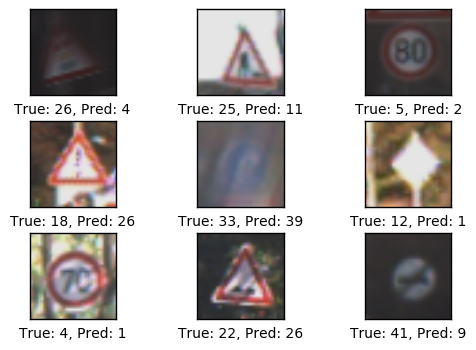

Confusion Matrix:
[[ 50   9   0 ...,   0   0   0]
 [  0 703   4 ...,   0   0   0]
 [  0  18 729 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  87   0   0]
 [  0   0   0 ...,   0  36   0]
 [  0   0   0 ...,   0   0  90]]


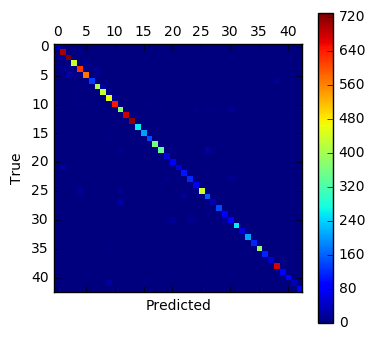

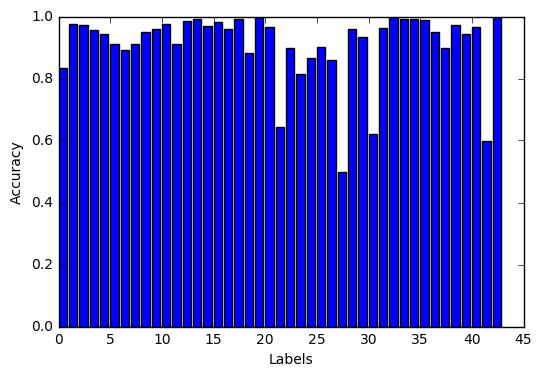

In [23]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

The model predict some traffice sign not very accurately like class 0,6,21,27,30 etc. 

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

See the code above. Here is how I preprocess the data:
1. Separate the training data into 90% traning and 10% validation set.
2. Nomalize the input data from (0,255) to (0.1,0.9).
3. One-hot enconded all the labels.

Added resoning:
1. For each traing, we need a seperate training, validation and testing sets. The training set is used to train the model. In this phase the validation should not been seen by the model to induce bias towards to the testing/validation set. Use the validation set to tune the parameters. After tunning and chose the model, then we use the test set to test our model and in this phase we cannot change any model parameter. Also in this phase, we randomize the original samples.
2. Normalize the data will make training process more stable by improving numerical condition. Also we can standardize the initilization of our weights and biases by sending standardized input. Overall will make training and prediction more robust.
3. The original labels is class labels with number from 0-42. To calculate the corss-entropy and minimize the loss we need to encode the label into a vector. 


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I have 90% traing data and 10% validation data and the number is printed above. We may want to generated additional data. From data visulization part, we sett the trainning data is not uniformly distributed and as a result the trainning model will be biased to those traffic signed with larger number. By generating more data we can make a model less biased. I will do this if I have time later but now I keep the data as it is.

### Define your architecture here.
### Feel free to use as many code cells as needed.

Please see my code above. 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I use pretty tensor to build a two-layer CNN. The first layer has 16 5x5 weight filter and followed by a max 2x2 pooling. The second layer uses 36 5x5 weight filter and followed by another max 2x2 pooling. The fully connected layer has 128 features. The activation used is Relu here.

In [24]:
### Train your model here.
### Feel free to use as many code cells as needed.

##Code above

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. Optimizer: user tensorflow AdamOptimizer
2. Batch size 128
3. Epochs: 100
4. Leaning rate: 1e-4

### Question 5


_What approach did you take in coming up with a solution to this problem?_

Answer:**

First this is a relative comliated computer vision problem so I think a CNN with works better than a simple linear neuron network model. So I pick up the deep learning CNN model. I got motivated by the Mnist CNN tutorial a similar architecture and it works well with the data. To optimize the parameter, it's just trial and error based on the training and validation accuraty. The I test the model on the test set and get the test accuracy.


Revised/Added answer:
After choosing CNN model there are a few parameter we can tune:
1. Number of hidden layer (1,2,3)
2. Batch Size (64,128)
3. Epochs number (10,50,100)
4. Learning rate (0.1, 0.01, 0.001, 0.0001)

I will try several combinations to get the optimized model. Here I will list the options I have tried and the perfromance of the model.
1. Layer (1) Batch (64) Epoch(10) Learning rate (0.1)  Training Accuracy:    3.1%     Testing Accuracy:   /
2. Layer (2) Batch (64) Epoch(10) Learning rate (0.1)  Training Accuracy:    3.1%     Testing Accuracy:   /
3. Layer (2) Batch (64) Epoch(10) Learning rate (0.01)  Training Accuracy:   93.8%     Testing Accuracy:   83.3%
4. Layer (2) Batch (64) Epoch(10) Learning rate (0.001)  Training Accuracy:   100%     Testing Accuracy:   93.4%
5. Layer (2) Batch (64) Epoch(10) Learning rate (0.0001)  Training Accuracy:   95.3%     Testing Accuracy:   85.4%  (overfitting)
6. Layer (3) Batch (64) Epoch(10) Learning rate (0.001)  Training Accuracy:   95.3%     Testing Accuracy:   92.5%
7. Layer (2) Batch (128) Epoch(10) Learning rate (0.001)  Training Accuracy:   95.3%     Testing Accuracy:   89.4%
8. Layer (2) Batch (64) Epoch(50) Learning rate (0.001)  Training Accuracy:   98.4%     Testing Accuracy:   94.2%
9. Layer (2) Batch (64) Epoch(100) Learning rate (0.001)  Training Accuracy:   100%     Testing Accuracy:   93.6%
10. Layer (2) Batch (128) Epoch(50) Learning rate (0.001)  Training Accuracy:   100%     Testing Accuracy:   92.6%

Final model: 
8. Layer (2) Batch (64) Epoch(50) Learning rate (0.001)  Training Accuracy:   100%     Testing Accuracy:   95.3%

To many Epoch or large batch size seem to be overfitting the data. To samll learning rate will may result stuck in the local minimum and have lower test accuracy. From trial and error, I found the model 8 performs the best. with around 95% test accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

#Show 5 images found from the internet

test1 = mpimg.imread('test1.jpg')
test2 = mpimg.imread('test2.jpg')
test3 = mpimg.imread('test3.jpg')
test4 = mpimg.imread('test4.jpg')
test5 = mpimg.imread('test5.jpg')

test1_2 = np.array([test1])
test2_2 = np.array([test2])
test3_2 = np.array([test3])
test4_2 = np.array([test4])
test5_2 = np.array([test5])

plt.subplot(331)
plt.imshow(test1)
plt.subplot(332)
plt.imshow(test2)
plt.subplot(333)
plt.imshow(test3)
plt.subplot(334)
plt.imshow(test4)
plt.subplot(335)
plt.imshow(test5)


test = np.concatenate((test1_2,test2_2, test3_2,test4_2,test5_2),axis=0)
test = normalize_colorscale(test)


session.run(y_pred_cls, feed_dict={x_image:test})

NameError: name 'normalize_colorscale' is not defined

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

See above 5 images. The models seems to be very confused of the Pedestrians and animals. This coms no suprise because it have one of the least training samples. We might want to generate some fake data for the extra training. Also this pedestrians signs is a little different from the training data set. Also the model confuse 60 and 50 in the image 5 due to low image quality.

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The result is (14, 29, 1, 14, 13). The accuracy is 40%. The test accuracy is around 95% so this result is not as good as the test set. I think we need generate more data to train the model better.

In [31]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top5 = tf.nn.top_k(y_pred,k=5)
prob = session.run(top5, feed_dict={x_image:test})
print (prob)

TopKV2(values=array([[  1.00000000e+00,   2.33715567e-14,   3.71832806e-23,
          2.20225043e-27,   2.54974588e-29],
       [  8.07791889e-01,   1.07285775e-01,   6.06398247e-02,
          2.14729179e-02,   1.86422188e-03],
       [  9.99949098e-01,   5.09187157e-05,   3.91742461e-09,
          3.18760285e-09,   7.36796527e-11],
       [  9.98714566e-01,   1.03950000e-03,   2.39355330e-04,
          6.60036585e-06,   2.47034637e-09],
       [  9.99998927e-01,   6.37230528e-07,   5.34236221e-07,
          2.34327544e-08,   2.99863578e-10]], dtype=float32), indices=array([[14, 17, 25, 29,  5],
       [29,  1,  4, 24, 21],
       [ 1,  0,  2,  4,  5],
       [14,  2,  9,  1, 13],
       [13,  3,  9,  2, 12]], dtype=int32))


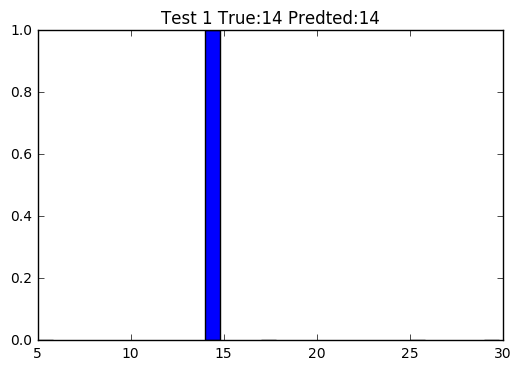

In [54]:
#Softmax probability visulization
plt.bar (prob[1][0],prob[0][0])
plt.title ('Test 1 True:14 Predted:14')

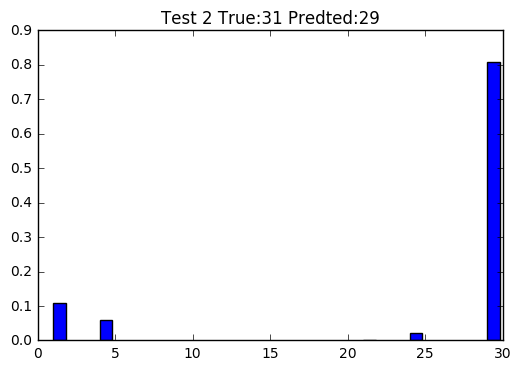

In [55]:
plt.bar (prob[1][1],prob[0][1])
plt.title ('Test 2 True:31 Predted:29')

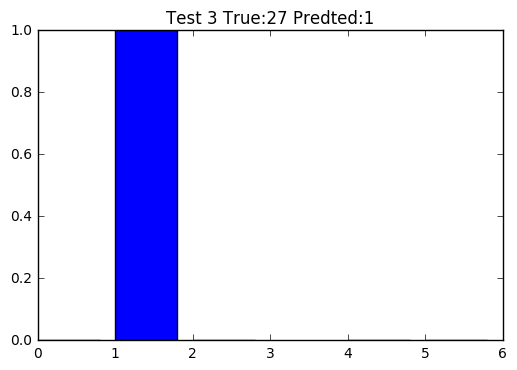

In [56]:
plt.bar (prob[1][2],prob[0][2])
plt.title ('Test 3 True:27 Predted:1')

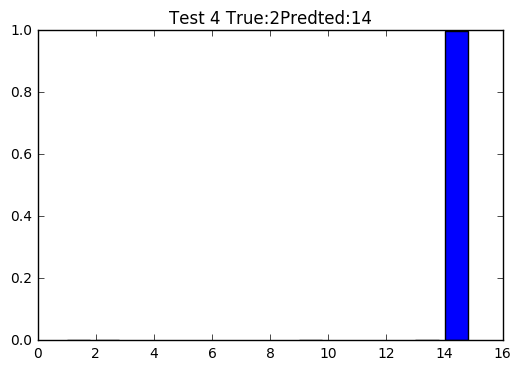

In [59]:
plt.bar (prob[1][3],prob[0][3])
plt.title ('Test 4 True:2Predted:14')

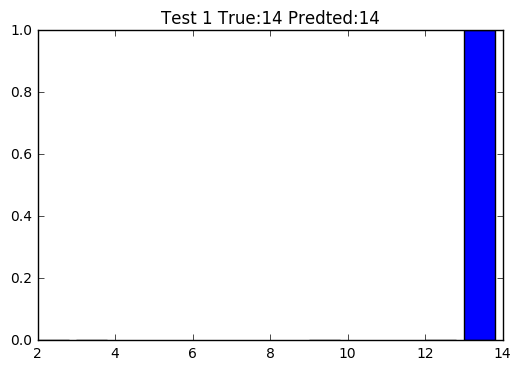

In [58]:
plt.bar (prob[1][4],prob[0][4])
plt.title ('Test 5 True:13 Predted:13')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
I print the softmax probablities above.
1. Stop sign: you can see the model is very sure this is a stop sign with p ~ 100%.
2. Wild animal: the label should be 31 and it doesn't show up in the top 5 which is quite strange. The test accuracy for this class is around 95%. The top 1 softmax prob is bicycle crossing and second is speed limit 20km/h. We might want to make more fake data in this class to increase the performance for this class.
3. Pedestrian: this sign is differece from the training set(background color yellow) so it doesn't show up in the top 5 with out any surprice. However, the model was pretty sure it was a speed limit sign.
4. Speed limit 50: the right label is 2 which has the second largest softmax probablities. The model is confused with a stop sign. But the model was pretty sure it was a stop sign which is quite weird.
5. Yield: This one model is also quite certain about the yield sign with 99% probability.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

I first crop the image to a square shape the downsampled it to 32x32 image and loaded into the test varibale to run my model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.